In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [440]:
# para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None) 

In [441]:
#Abro y creo un dataFrame con la información de los vuelos
df_Customer_Flight_Activity = pd.read_csv('./files/Customer_Flight_Activity.csv')

In [442]:
#Abro y creo un dataFrame con la información de los clientes
df_Customer_Loyalty_History = pd.read_csv('./files/Customer_Loyalty_History.csv')

---------------------------------------------------

**Fase 1: Exploración y Limpieza**

**1.Exploración Inicial**

In [443]:
df_Customer_Flight_Activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [444]:
df_Customer_Flight_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [445]:
nulos = df_Customer_Flight_Activity.isnull().sum()
nulos

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

'df_Customer_Flight_Activity' = este data frame no tiene nulos

In [446]:
df_Customer_Flight_Activity.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [447]:
df_Customer_Flight_Activity['Points Accumulated'].unique()

array([152.  , 203.  , 120.  , ...,  18.75, 601.  , 626.  ])

**Sigo con el otro Data Frame**

In [448]:
df_Customer_Loyalty_History.sample(5)
#me gusta usar el sample para que elija aleatorios

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
9777,440595,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,71130.0,Married,Nova,37243.63,Standard,2013,11,NaN,NaN
7229,839579,Canada,Ontario,Ottawa,K1G 4Z0,Male,Bachelor,66742.0,Divorced,Nova,6411.68,Standard,2017,10,NaN,NaN
10522,684103,Canada,Quebec,Tremblant,H5Y 2S9,Male,College,NaN,Single,Star,2448.86,Standard,2016,7,2017.0,3.0
11533,644163,Canada,Ontario,Toronto,M2M 7K8,Female,Bachelor,52928.0,Married,Star,2673.32,Standard,2015,4,NaN,NaN
14460,924878,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,58318.0,Married,Nova,7834.15,2018 Promotion,2018,3,NaN,NaN


tiene letras y numeros

In [449]:
df_Customer_Loyalty_History.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

**Verifico valores unicos para las columnas**

-- 16737 entries, veo que tiene esa cantidad de filas 
-- veo cancelation year y month son float y veo que salary es float tambien

-- chequeo si postal code si es que deberia ser solamente numerico
-- ver valores unicos en gender, marital status.

In [450]:
df_Customer_Loyalty_History["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [451]:
df_Customer_Loyalty_History["Marital Status"].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [452]:
df_Customer_Loyalty_History["Postal Code"].unique()

array(['M2Z 4K1', 'T3G 6Y6', 'V6E 3D9', 'P1W 1K4', 'J8Y 3Z5', 'Y2K 6R0',
       'P5S 6R4', 'K8V 4B2', 'H2Y 2W2', 'M8Y 4K8', 'U5I 4F1', 'G1B 3L5',
       'H4G 3T4', 'M2M 7K8', 'M2M 6J7', 'E3B 2H2', 'M1R 4K3', 'T9G 1W3',
       'H2Y 4R4', 'V5R 1W3', 'P1L 8X8', 'K1F 2R2', 'H5Y 2S9', 'V1E 4R6',
       'H2T 2J6', 'T3E 2V9', 'H2T 9K8', 'K8T 5M5', 'V6T 1Y8', 'P2T 6G3',
       'T9O 2W2', 'V6E 3Z3', 'R6Y 4T5', 'M5V 1G5', 'V6V 8Z3', 'B3J 9S2',
       'M5B 3E4', 'R2C 0M5', 'S6J 3G0', 'M2P 4F6', 'P1J 8T7', 'V09 2E9',
       'A1C 6H9', 'V10 6T5', 'B3C 2M8', 'M9K 2P4', 'T4V 1D4', 'R3R 3T4',
       'S1J 3C5', 'E1A 2A7', 'K1G 4Z0', 'H3T 8L4', 'C1A 6E8', 'H3J 5I6',
       'M3R 4K8'], dtype=object)

In [453]:
df_Customer_Loyalty_History["Loyalty Card"].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

In [454]:
df_Customer_Loyalty_History["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [455]:
df_Customer_Loyalty_History["Country"].unique()

array(['Canada'], dtype=object)

In [456]:
df_Customer_Loyalty_History["Cancellation Year"].unique()

array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [457]:
df_Customer_Loyalty_History["Cancellation Month"].unique()

array([nan,  1., 12.,  4.,  2.,  7., 11.,  5.,  6., 10.,  8.,  9.,  3.])

In [458]:
df_Customer_Loyalty_History["Province"].unique()

array(['Ontario', 'Alberta', 'British Columbia', 'Quebec', 'Yukon',
       'New Brunswick', 'Manitoba', 'Nova Scotia', 'Saskatchewan',
       'Newfoundland', 'Prince Edward Island'], dtype=object)

In [459]:
df_Customer_Loyalty_History["City"].unique()

array(['Toronto', 'Edmonton', 'Vancouver', 'Hull', 'Whitehorse',
       'Trenton', 'Montreal', 'Dawson Creek', 'Quebec City',
       'Fredericton', 'Ottawa', 'Tremblant', 'Calgary', 'Thunder Bay',
       'Whistler', 'Peace River', 'Winnipeg', 'Sudbury', 'West Vancouver',
       'Halifax', 'London', 'Regina', 'Kelowna', "St. John's", 'Victoria',
       'Kingston', 'Banff', 'Moncton', 'Charlottetown'], dtype=object)

In [460]:
df_Customer_Loyalty_History["Enrollment Type"].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [461]:
df_Customer_Loyalty_History["Enrollment Month"].unique()

array([ 2,  3,  7, 10,  5,  6, 12,  1, 11,  8,  4,  9])

In [462]:
df_Customer_Loyalty_History["Enrollment Year"].unique()

array([2016, 2014, 2013, 2012, 2015, 2018, 2017])

In [463]:
df_Customer_Loyalty_History.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

Hay muchos nulos en cancelation year y en cancelation month.Casi en su totalidad. Porque deben ser usuarios activos, en cambios los que si contienen datos son los que ya no estan activos. 
y hay algunos nulos en salaray, pero aproximadamente un 1/3 de todas las entradas.

In [464]:
#saco en porcentaje los nulos
nulos = df_Customer_Loyalty_History.isnull().sum()
porcentaje_nulos = (nulos / df_Customer_Loyalty_History.shape[0]) * 100

In [465]:
porcentaje_nulos

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

-----------------------------------------------------------

**2. Limpieza de Datos:**

In [466]:
df_Customer_Flight_Activity.duplicated().sum()

np.int64(1864)

In [467]:
#limpio los 1864 duplicados de flight activity
df_Customer_Flight_Activity = df_Customer_Flight_Activity.drop_duplicates() 

In [468]:
#confirmo haber eliminado los duplicados
df_Customer_Flight_Activity.duplicated().sum()

np.int64(0)

In [469]:
#Relleno los nulos de cancelation year y month que estan vacios o nulos con el numero 0
df_Customer_Loyalty_History["Cancellation Year"].fillna("0", inplace=True)
df_Customer_Loyalty_History["Cancellation Month"].fillna("0", inplace=True)


/var/folders/r0/g4nxs3t525qfy65ly6y43jyw0000gn/T/ipykernel_93263/193032158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Customer_Loyalty_History["Cancellation Year"].fillna("0", inplace=True)
/var/folders/r0/g4nxs3t525qfy65ly6y43jyw0000gn/T/ipykernel_93263/193032158.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_Customer_Loyalty_Histor

In [470]:
df_Customer_Loyalty_History.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
2509,898514,Canada,Alberta,Peace River,T9O 2W2,Female,High School or Below,60681.0,Married,Aurora,8269.08,Standard,2018,1,0,0
2434,244734,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,54294.0,Married,Aurora,8114.41,Standard,2018,7,0,0
4678,138204,Canada,Quebec,Montreal,H2Y 2W2,Male,College,NaN,Single,Nova,3008.97,Standard,2016,7,0,0
7882,846515,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,55432.0,Married,Nova,7887.82,Standard,2017,5,0,0
14736,717308,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,78464.0,Married,Star,7712.44,Standard,2014,6,0,0


In [471]:
#cambio el tipo float a enteros para los años y meses queden en numeros enteros y no con decimales
df_Customer_Loyalty_History["Cancellation Year"] = df_Customer_Loyalty_History["Cancellation Year"].astype(int)
df_Customer_Loyalty_History["Cancellation Month"] = df_Customer_Loyalty_History["Cancellation Month"].astype(int)
df_Customer_Loyalty_History.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
4348,862932,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,60428.0,Married,Nova,2821.95,Standard,2017,8,0,0
14180,740814,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,97333.0,Married,Star,6298.18,Standard,2015,7,0,0
2777,500788,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,92396.0,Married,Aurora,8838.09,Standard,2012,8,0,0
2901,454073,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,103420.0,Married,Aurora,9277.47,Standard,2016,8,0,0
6088,743879,Canada,British Columbia,Vancouver,V6E 3D9,Female,High School or Below,78644.0,Divorced,Nova,4770.74,Standard,2016,7,0,0


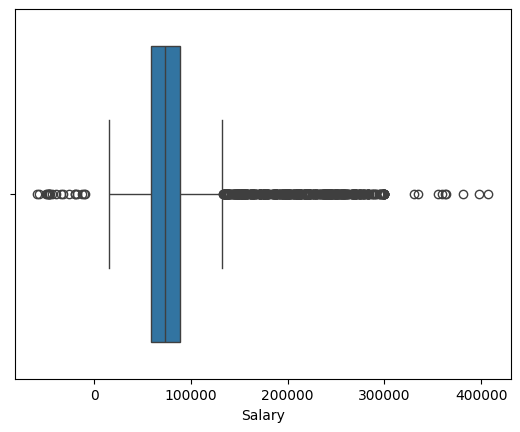

In [472]:
#para la columna sueldos que es Numérica y tiene bajos nulos
#- distribución simétrica: imputación con la media
#- distribución asimétrica: imputación con la mediana

sns.boxplot(x= "Salary", data= df_Customer_Loyalty_History); 

In [473]:
df_Customer_Loyalty_History["Salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970., -57297.])

In [474]:
#veo que hay valores negativos, entonces elimino esos valores en neagtivos
df_Customer_Loyalty_History["Salary"] = df_Customer_Loyalty_History["Salary"].abs()

In [475]:
#verifico haber eliminado esos valores negativos
df_Customer_Loyalty_History["Salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970.,  57297.])

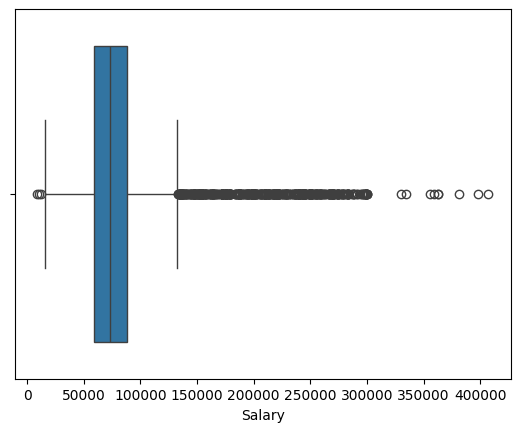

In [476]:
#verifico haber eliminado esos valores negativos por medio de un boxplot para asegurarme bien
sns.boxplot(x= "Salary", data= df_Customer_Loyalty_History); 

In [477]:
#veo distribución asimétrica, por eso inputo con la mediana y no con la media
df_Customer_Loyalty_History["Salary"].fillna(df_Customer_Loyalty_History["Salary"].median(), inplace=True)

/var/folders/r0/g4nxs3t525qfy65ly6y43jyw0000gn/T/ipykernel_93263/4128205928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Customer_Loyalty_History["Salary"].fillna(df_Customer_Loyalty_History["Salary"].median(), inplace=True)


In [478]:
#Verifico que no haya valores nulos
df_Customer_Loyalty_History.isnull().sum()

Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

---------------------------------------------------------------

**HAGO LA UNION DE AMBOS DATA FRAMES**

In [479]:
#Uno los dos data frames por la columna "Loyalty Number"
df_completo_aerolinea = df_Customer_Flight_Activity.merge(df_Customer_Loyalty_History, on =["Loyalty Number"], how = "left")
df_completo_aerolinea.sample(5)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
387305,890543,2017,3,7,7,14,994,99.0,401,33,Canada,Ontario,Kingston,M9K 2P4,Male,High School or Below,59155.0,Single,Star,6558.88,Standard,2012,5,0,0
12642,775170,2017,1,1,0,1,450,45.0,0,0,Canada,Manitoba,Winnipeg,R3R 3T4,Male,Bachelor,49886.0,Married,Nova,12880.75,Standard,2015,11,0,0
392079,377173,2018,12,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H3T 8L4,Male,Bachelor,100914.0,Divorced,Nova,2814.21,Standard,2013,11,0,0
198990,849569,2017,12,0,0,0,0,0.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,85573.0,Married,Nova,2821.35,Standard,2018,8,0,0
2315,225327,2017,1,4,1,5,380,38.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,84015.0,Married,Nova,25807.06,Standard,2015,8,0,0


In [480]:
df_completo_aerolinea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

-------------------------------------------------------------

**Fase 2: Visualización**

In [481]:
#¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
df_cantidad_vuelos_xmes = df_completo_aerolinea.groupby("Month")["Flights Booked"].count().reset_index()

#Antes de hacer este grafico voy a cambiar los numero de los meses por sus nombres
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(1, "Enero")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(2, "Febrero")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(3, "Marzo")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(4, "Abril")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(5, "Mayo")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(6, "Junio")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(7, "Julio")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(8, "Agosto")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(9, "Septiembre")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(10, "Octubre")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(11, "Noviembre")
df_cantidad_vuelos_xmes["Month"] = df_cantidad_vuelos_xmes["Month"].replace(12, "Deciembre")

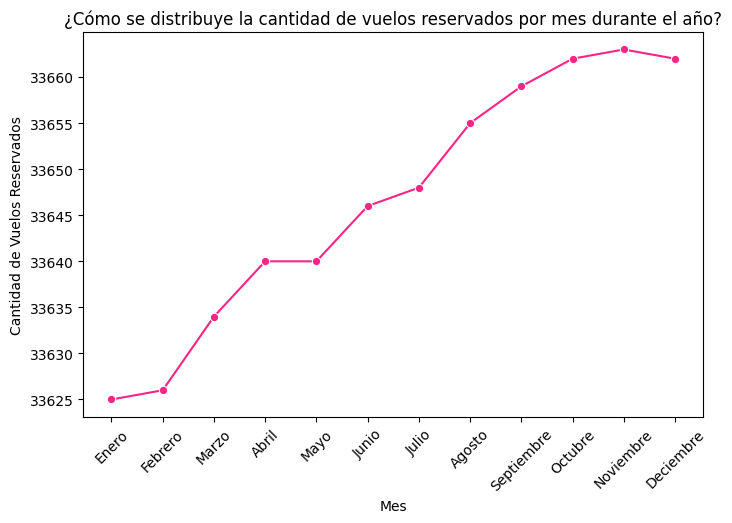

In [482]:
#HistogramaPrimero hice un histograma y como los valoes estan muy cercanos, decidi hacer un lineplot, para que se vea mejor la diferencia
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_cantidad_vuelos_xmes, x="Month", y="Flights Booked", marker='o', color="#F72585");
plt.title('¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.xticks(rotation = 45);
plt.show()

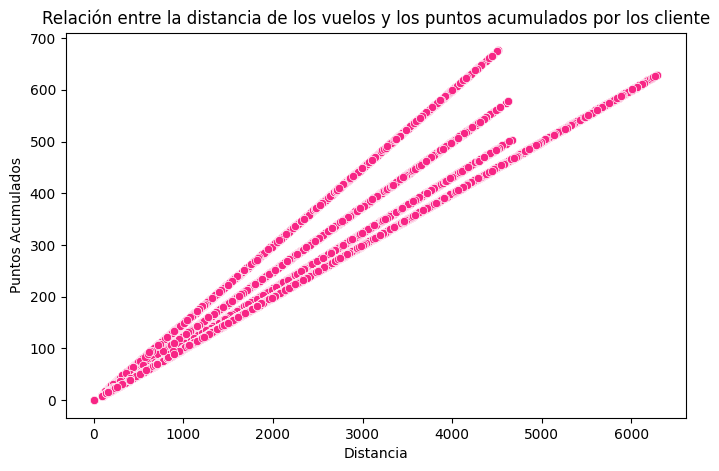

In [483]:
#2 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
#Hago un scatter plot para ver bien que si hay correlacion
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Distance', y='Points Accumulated', data=df_completo_aerolinea, color="#F72585")
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados por los cliente')
plt.xlabel('Distancia')
plt.ylabel('Puntos Acumulados')
plt.show()

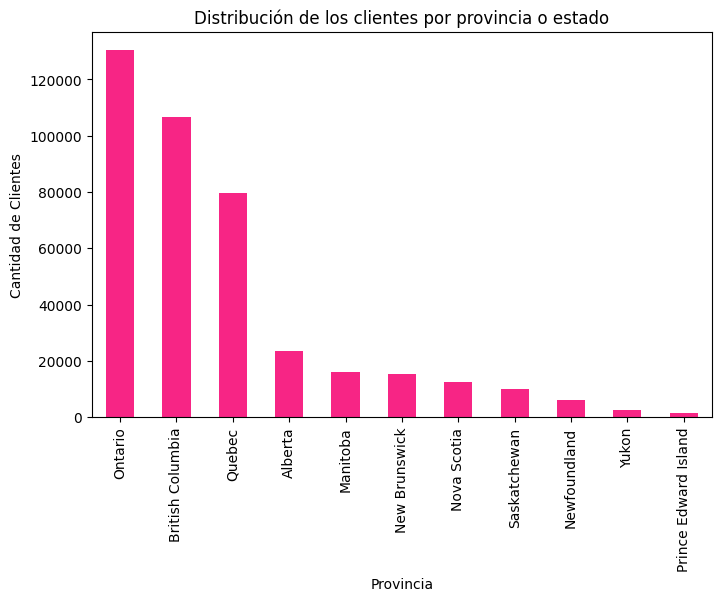

In [484]:
#3.¿Cuál es la distribución de los clientes por provincia o estado?
#directamente cuento la cantidad de veces que se repite la provincia, porque no hay "Royalty Number" repetidos
#Histograma
plt.figure(figsize=(8, 5))
df_completo_aerolinea["Province"].value_counts().plot(kind='bar', color="#F72585")
plt.title('Distribución de los clientes por provincia o estado')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Clientes')
plt.show()

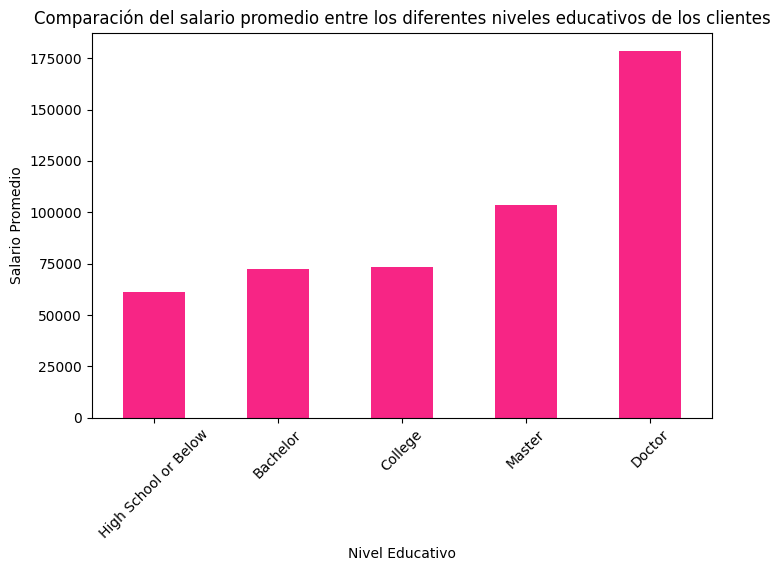

In [485]:
#4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
#Puse el .sort_values() para que se vea mejor el grafico, de menor a mayor
df_salario_x_educacion = df_completo_aerolinea.groupby("Education")["Salary"].mean().sort_values()
#Histograma
plt.figure(figsize=(8, 5))
df_salario_x_educacion.plot(kind='bar', color="#F72585")
plt.title('Comparación del salario promedio entre los diferentes niveles educativos de los clientes')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.xticks(rotation = 45);
plt.show()

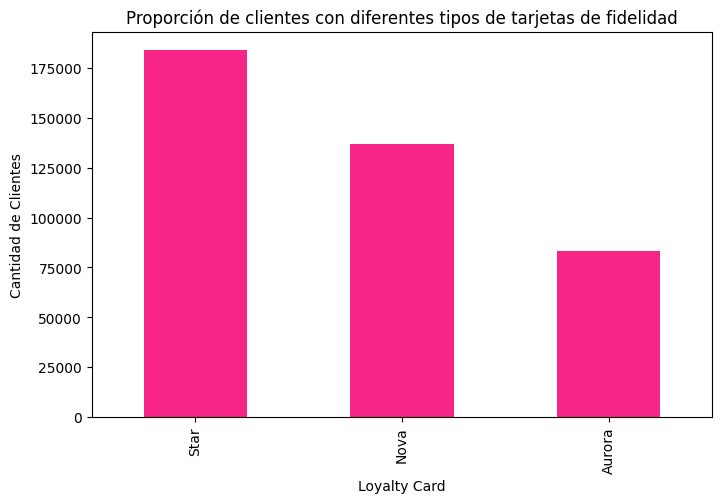

In [486]:
#5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
#hice un histograma
plt.figure(figsize=(8, 5))
df_completo_aerolinea["Loyalty Card"].value_counts().plot(kind='bar', color="#F72585")
plt.title('Proporción de clientes con diferentes tipos de tarjetas de fidelidad')
plt.xlabel('Loyalty Card')
plt.ylabel('Cantidad de Clientes')
plt.show()


In [487]:
estadocivilxmujeres = df_completo_aerolinea[df_completo_aerolinea["Gender"] == "Female"].groupby("Marital Status")["Gender"].count().reset_index()
estadocivilxmujeres

,Marital Status,Gender
0,Divorced,30634
1,Married,117363
2,Single,54760


In [488]:
estadocivilxhombres = df_completo_aerolinea[df_completo_aerolinea["Gender"] == "Male"].groupby("Marital Status")["Gender"].count().reset_index()
estadocivilxhombres 

,Marital Status,Gender
0,Divorced,30128
1,Married,117482
2,Single,53393


In [489]:
#Defini en una funcion los colores exactos que queria usar para que se diferencien bien entre los dos generos
paleta_colores = ["#F72585", "#4CC9F0"]

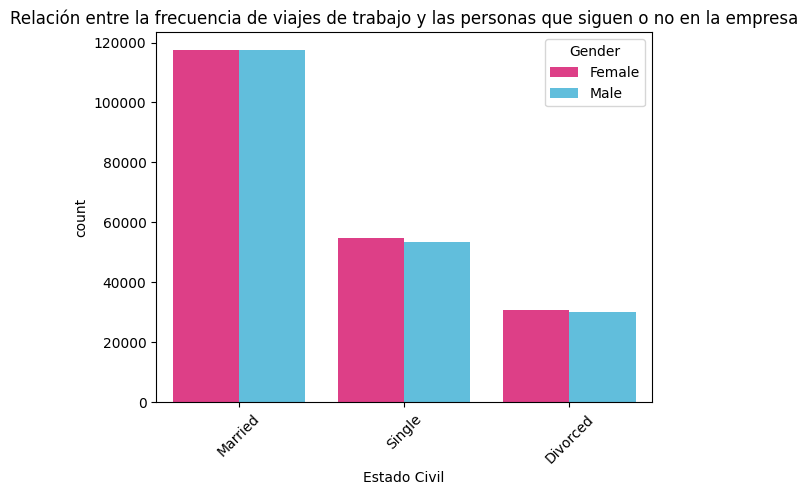

In [490]:
#6. ¿Cómo se distribuyen los clientes según su estado civil y género?
sns.countplot(x = "Marital Status", data=df_completo_aerolinea, hue='Gender', palette=paleta_colores);
plt.xticks(rotation = 45);
plt.title('Relación entre la frecuencia de viajes de trabajo y las personas que siguen o no en la empresa')
plt.xlabel('Estado Civil')
plt.show()

-----------------------------------------------------------------------

**BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo**

Buscan evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes

**Preparacion de Datos:**

In [491]:
#Elijo solamente las columnas con las que voy a trabajar 'Flights Booked' y 'Education'. Y las pongo en un data frame aparte
df_bonus = df_completo_aerolinea[['Flights Booked', 'Education']]

In [492]:
df_bonus.head()

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


**Análisis Descriptivo:**

In [493]:
#calculo de las estadísticas descriptivas básicas del número de vuelos reservados para cada grupo.
df_x_nivel_educativo = df_bonus.groupby("Education")["Flights Booked"].describe()
df_x_nivel_educativo

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


In [494]:
df_x_nivel_educativo = df_bonus.groupby("Education")["Flights Booked"].count()
df_x_nivel_educativo  

Education
Bachelor                252567
College                 102260
Doctor                   17731
High School or Below     18915
Master                   12287
Name: Flights Booked, dtype: int64

**Prueba Estadística:**

In [495]:
#importo las bibliotecas que voy a necesitar
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

In [496]:
#Defino los grupos
Grupo1 = df_bonus[df_bonus["Education"] == "High School or Below"]["Flights Booked"].values
Grupo2 = df_bonus[df_bonus["Education"] == "College"]["Flights Booked"].values
Grupo3 = df_bonus[df_bonus["Education"] == "Bachelor"]["Flights Booked"].values
Grupo4 = df_bonus[df_bonus["Education"] == "Master"]["Flights Booked"].values
Grupo5 = df_bonus[df_bonus["Education"] == "Doctor"]["Flights Booked"].values

In [497]:
#Uso la variable que nos paso Yanelis en la clase, para probar la hipotesis
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney (alternativa no paramétrica).

    Parámetros:
    *args: listas o arrays con los datos de cada grupo.

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 5000:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U (prueba no paramétrica)"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0 (Diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

    return resultado

Voy a ir comparando de a 2 grupos

In [498]:
prueba_hipotesis(Grupo1, Grupo2)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.9502)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 969453228.5000, p-valor: 0.5757
🔍 Conclusión: No se rechaza H0 (No hay diferencias significativas)



{'Test de Normalidad': [np.False_, np.False_],
 'Datos Normales': False,
 'p-valor Varianza': np.float64(0.9501570166570465),
 'Varianzas Iguales': np.True_,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'Estadístico': np.float64(969453228.5),
 'p-valor': np.float64(0.575742751816062),
 'Conclusión': 'No se rechaza H0 (No hay diferencias significativas)'}

In [499]:
prueba_hipotesis(Grupo2, Grupo3)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Desiguales (p = 0.0027)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 12993040557.5000, p-valor: 0.0023
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [np.False_, np.False_],
 'Datos Normales': False,
 'p-valor Varianza': np.float64(0.0027344618372075052),
 'Varianzas Iguales': np.False_,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'Estadístico': np.float64(12993040557.5),
 'p-valor': np.float64(0.002278100128804696),
 'Conclusión': 'Rechazamos H0 (Diferencias significativas)'}

In [500]:
prueba_hipotesis(Grupo3, Grupo4)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.1183)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 1532540228.0000, p-valor: 0.0141
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [np.False_, np.False_],
 'Datos Normales': False,
 'p-valor Varianza': np.float64(0.11827519458967656),
 'Varianzas Iguales': np.True_,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'Estadístico': np.float64(1532540228.0),
 'p-valor': np.float64(0.014056962299193064),
 'Conclusión': 'Rechazamos H0 (Diferencias significativas)'}

In [501]:
prueba_hipotesis(Grupo4, Grupo5)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.8104)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 109499288.0000, p-valor: 0.4139
🔍 Conclusión: No se rechaza H0 (No hay diferencias significativas)



{'Test de Normalidad': [np.False_, np.False_],
 'Datos Normales': False,
 'p-valor Varianza': np.float64(0.8104207838865031),
 'Varianzas Iguales': np.True_,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'Estadístico': np.float64(109499288.0),
 'p-valor': np.float64(0.41389638430638065),
 'Conclusión': 'No se rechaza H0 (No hay diferencias significativas)'}

----------------------------------------------

Aclaraciones:
Mann-Whitney U y los T-tests solo funcionan con dos grupos.
Asique Voy a usar una funcion sacada de chat gpt, que usa otras funciones para sacar estadisticas entre mas grupos, y ver si puedo comparar los 5 grupos juntos.

In [502]:
# Install scipy if not already installed
%pip install scipy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [503]:
import scipy.stats as stats

In [504]:
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar múltiples grupos.
    """

    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos grupos para la prueba.")

    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 5000:
            p_valor_norm = stats.kstest(grupo, 'norm', args=(np.mean(grupo), np.std(grupo))).pvalue
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)

    # Prueba de igualdad de varianzas (solo si los grupos tienen al menos 2 datos)
    if all(len(grupo) > 1 for grupo in args):
        if datos_normales:
            p_valor_varianza = stats.bartlett(*args).pvalue
        else:
            p_valor_varianza = stats.levene(*args, center="median").pvalue
    else:
        p_valor_varianza = 1

    varianzas_iguales = p_valor_varianza > 0.05

    # Prueba estadística
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.f_oneway(*args)
            test_usado = "ANOVA (varianzas iguales)"
        else:
            t_stat, p_valor = stats.kruskal(*args)
            test_usado = "Kruskal-Wallis (datos normales, varianzas desiguales)"
    else:
        t_stat, p_valor = stats.kruskal(*args)
        test_usado = "Kruskal-Wallis (prueba no paramétrica)"

    # Resultado
    alfa = 0.05
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0 (Diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }

    # Mostrar resultados
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

    return resultado

In [506]:
#Aplico la función para comparar los 5 grupos
prueba_hipotesis(Grupo1, Grupo2, Grupo3, Grupo4, Grupo5)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_, np.False_, np.False_, np.False_]
✅ Test de Varianza: Desiguales (p = 0.0150)
✅ Test aplicado: Kruskal-Wallis (prueba no paramétrica)
📉 Estadístico: 17.5326, p-valor: 0.0015
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [np.False_, np.False_, np.False_, np.False_, np.False_],
 'Datos Normales': False,
 'p-valor Varianza': np.float64(0.014969793534495703),
 'Varianzas Iguales': np.False_,
 'Test Usado': 'Kruskal-Wallis (prueba no paramétrica)',
 'Estadístico': np.float64(17.532618623121756),
 'p-valor': np.float64(0.0015225470219889367),
 'Conclusión': 'Rechazamos H0 (Diferencias significativas)'}

**Conclusion**

Rechazo Hipotesis. Hay Diferencias significativas entre el número de vuelos reservados según el nivel educativo de los clientes.